<a href="https://colab.research.google.com/github/jayativijaywargiya/CNN-on-MNIST---A-learning-approach/blob/main/NN_on_IRIS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment
# Deep Learning for Computational Data Scienc
# - Jayati Vijaywargiya
# - SC20D024
# Ques 2

#Applying a simple Neural Network on IRIS dataset

# 1. import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. import dataset
> The Iris flower data set or Fisher's Iris data set is a multivariate data set
>The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).
>>Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
>>>Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

Now, to vizualize, we will plot the data points

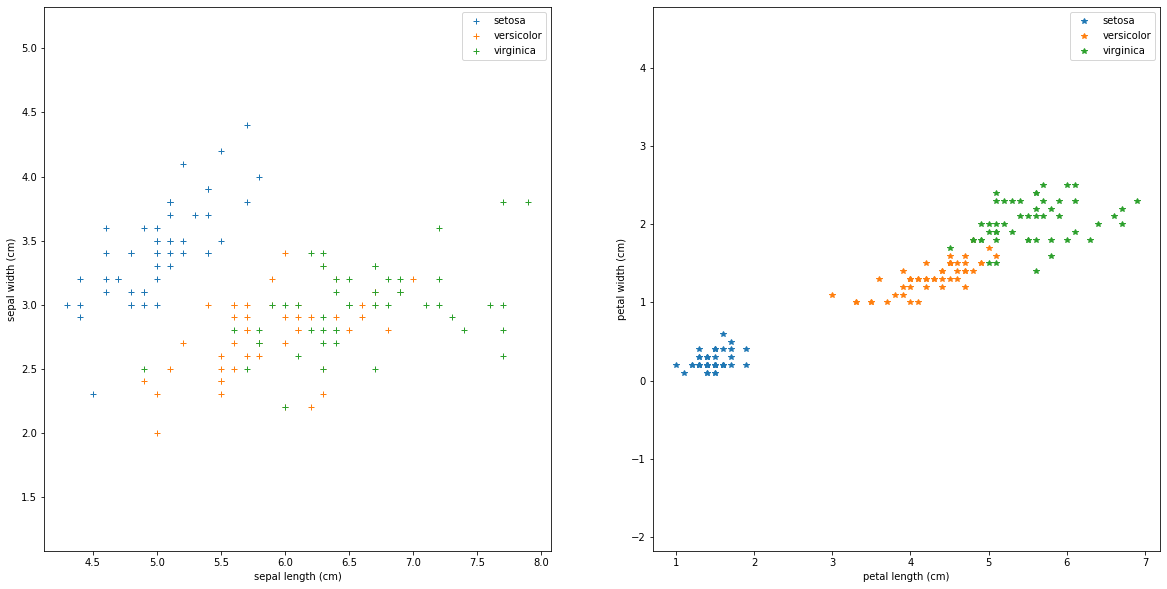

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='+', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='*', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

Now we scale the data, such that the scaled data has mean 0 and variance 1 
It is usually done in any ML algorithms for better convergence rate of the neural network or of algorithm, in general


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

If we open the .csv file of dataset we see the how to classes are mentioned in data, to make a single axis of class we use one-hot encoding
>A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers.

In [9]:
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

Split datset in training, testing and validation dataset

In [13]:
X_train, IX_test, Y_train, IY_test = train_test_split(
    X_scaled, Y, test_size=0.3, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [14]:
np.shape(X_train)

(105, 4)

In [15]:
X_test, X_val, Y_test, Y_val =train_test_split(IX_test, IY_test, test_size = 0.3)

In [16]:
np.shape(X_test)

(31, 4)

Now we will create a simple CNN model,
>If you dont know much about its theory part, Please spend 5minutes and check this video
https://www.youtube.com/watch?v=6Y4BEwAo1i8

In [28]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=(4,)))
model.add(layers.Dense(9, activation='relu', input_shape=(4,)))
model.add(layers.Dense(3, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
h1 =model.fit(X_train, Y_train,batch_size=5,epochs=20,verbose=1,validation_data=(X_val, Y_val))



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 18)                90        
_________________________________________________________________
dense_13 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 30        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
21/21 [==============================] - 0s 7ms/step - loss: 1.2766 - accuracy: 0.1619 - val_loss: 1.1617 - val_accuracy: 0.3571
Epoch 2/20
21/21 [==============================] - 0s 2ms/step - loss: 1.1341 - accuracy: 0.2095 - val_loss: 1.0694 - val_accuracy: 0.3571
Epoch 3/20
21/21 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.2667 - val_lo

In the above neural network accuracy increased with number of epochs, plotting the same

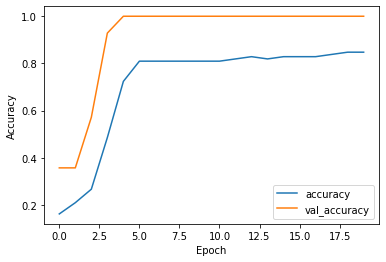

In [29]:
plt.plot(h1.history['accuracy'], label='accuracy')
plt.plot(h1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

The neural network reached pretty good accuracy on validation data, now let us see its accuracy on test data

In [30]:

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

1/1 - 0s - loss: 0.3815 - accuracy: 0.7419


#Inference

In this excercise,
1. A 3 layer Fully connected dense Neural Network was built
2. The layers had 18,9 and 3 hidden neurons for classification
3. Softmax activation layer is used for classification 
4. ReLu activation function is used in hidden layer
5. The validation accuracy improved with iterations
6. Finally a validation accuracy of 100 % and test accuracy of 74% is achieved, it still has scope for improvement